In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)   # show all columns
%matplotlib inline

In [2]:
#drop where bad_flag is null
train = pd.read_csv(r"C:\Users\luwil\Documents\misc_data\training_loan_data.csv", header =1)
train = train.dropna(subset=["bad_flag"])

In [3]:
# --- BASIC INFO ---
print("Shape:", train.shape)
print("\nColumns:", train.columns.tolist())
print("\nInfo:")
print(train.info())
missing_pct = train.isna().mean().sort_values(ascending=False) * 100
print("\nMissing values (% of rows) per column:")
print(missing_pct)

Shape: (189457, 23)

Columns: ['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag', 'internal_score', 'bad_flag']

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 189457 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           189457 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    189457 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership           

In [4]:
train.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [5]:
numeric_cols = train.select_dtypes(include=["number"]).columns
categorical_cols = train.select_dtypes(exclude=["number"]).columns

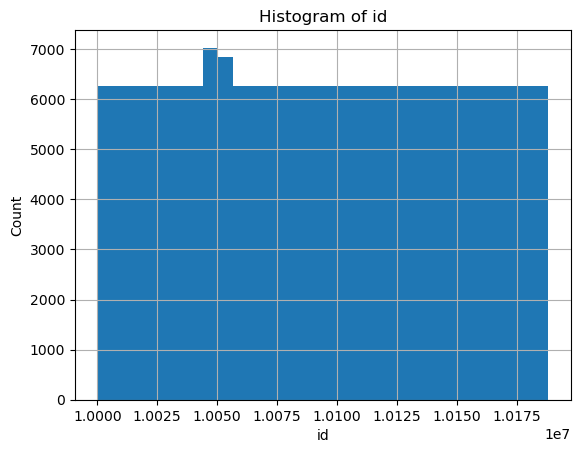

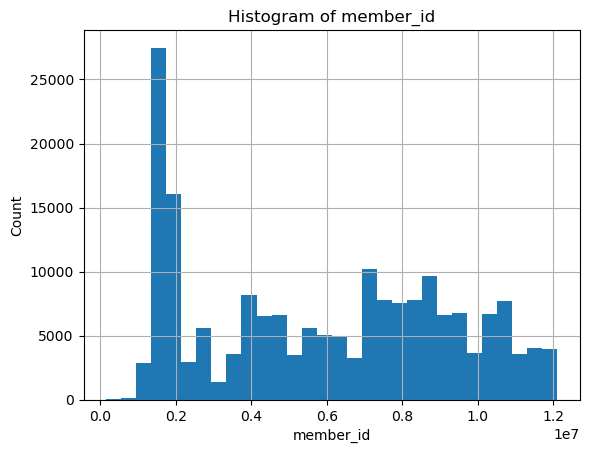

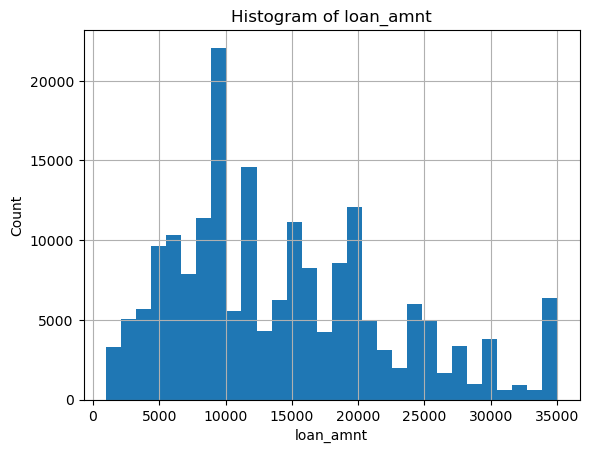

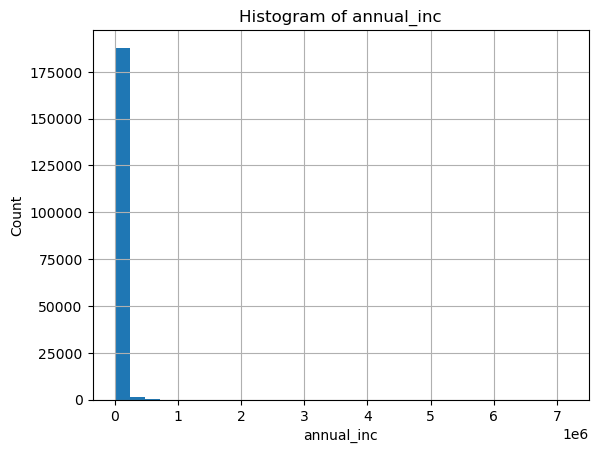

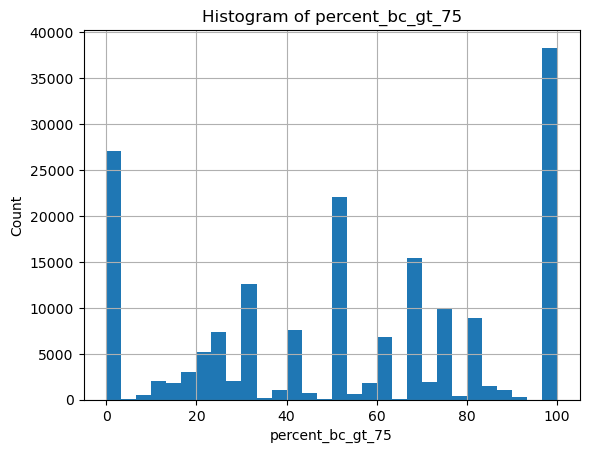

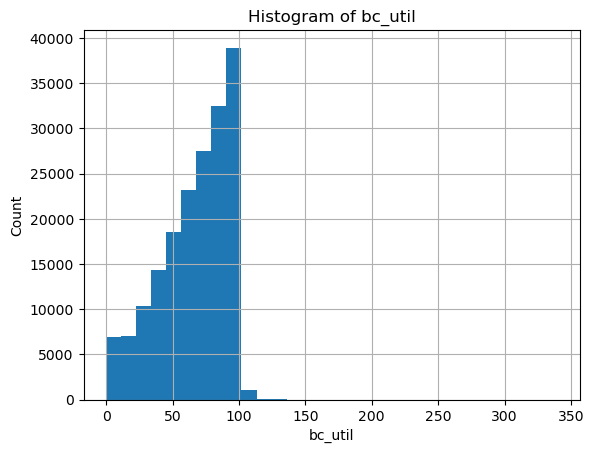

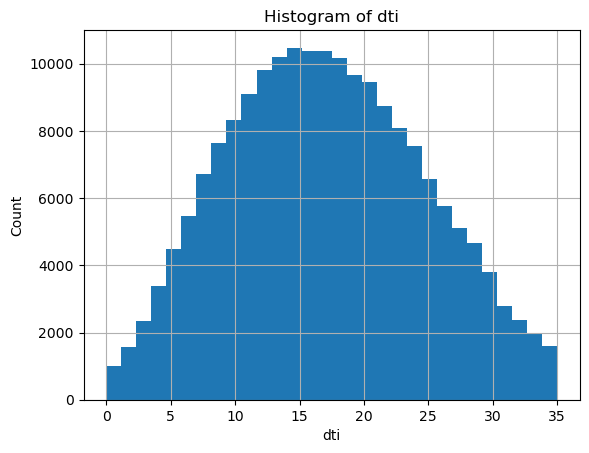

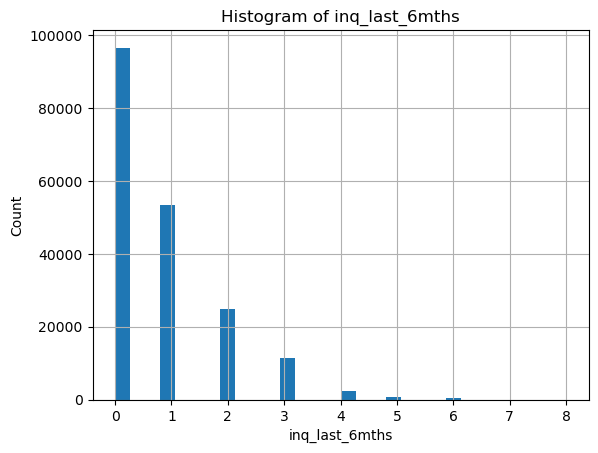

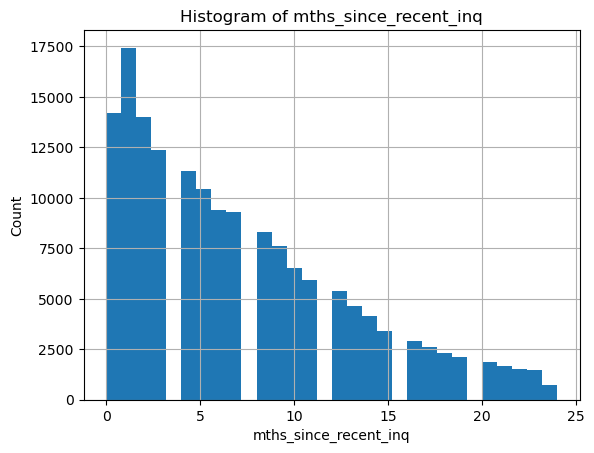

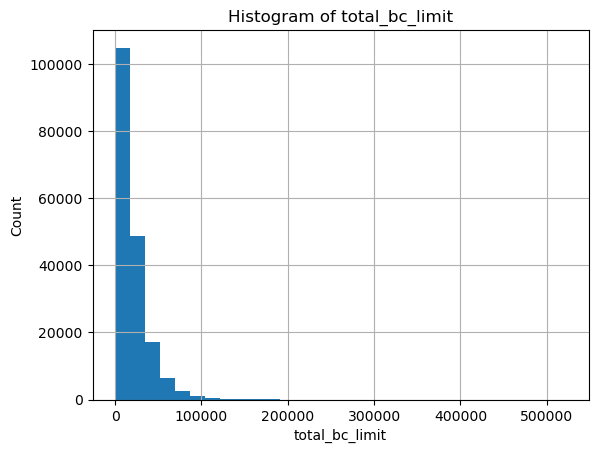

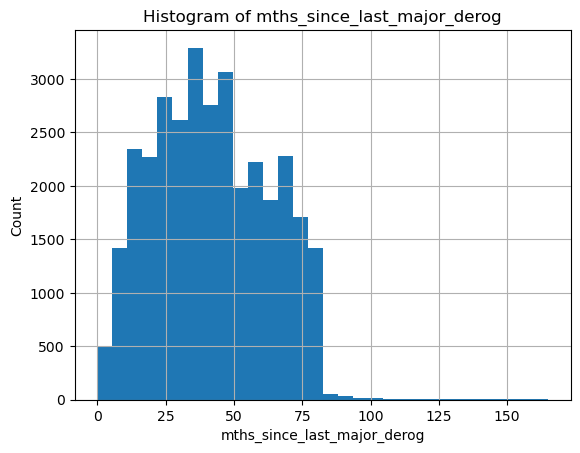

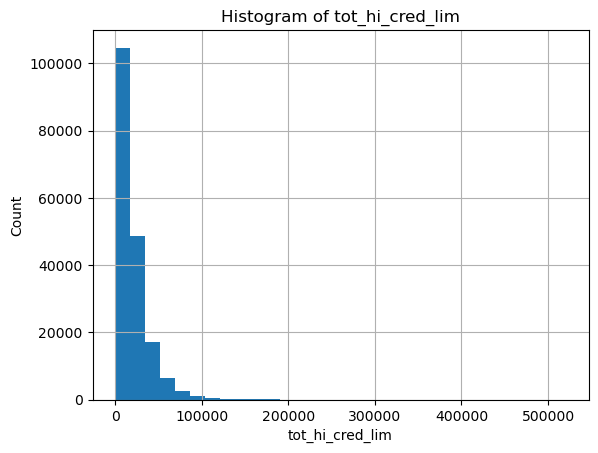

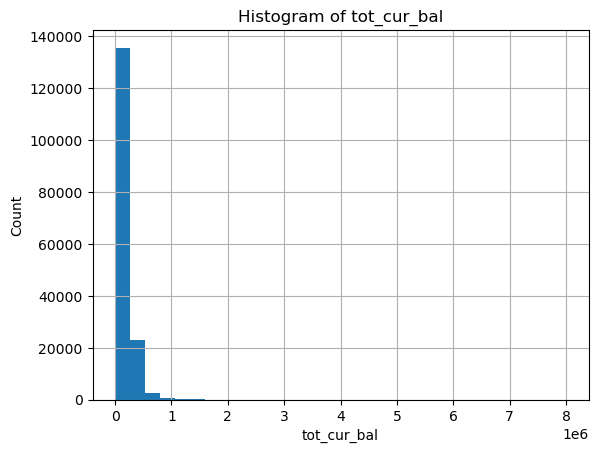

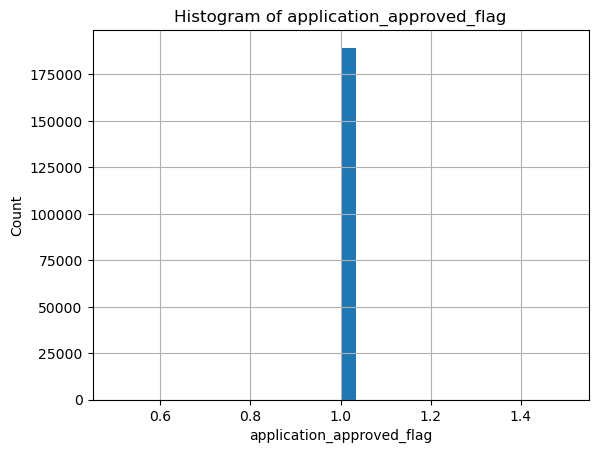

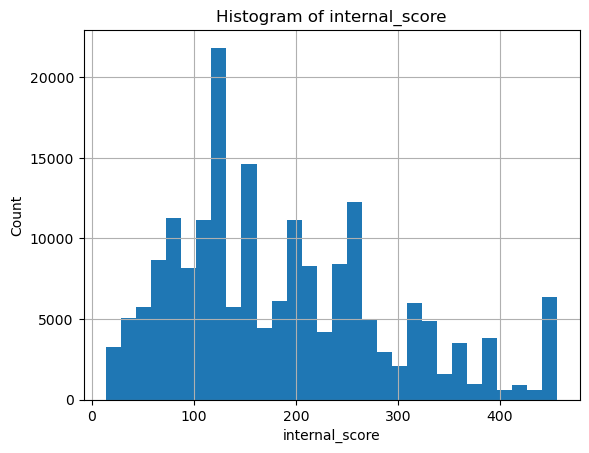

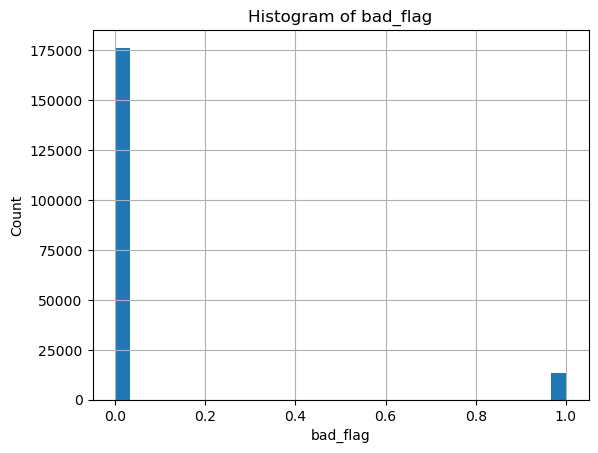

In [6]:
# Plot histograms for numeric features
#columns like id and memberid won't be used.
for col in numeric_cols:
    train[col].dropna().astype(float).hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

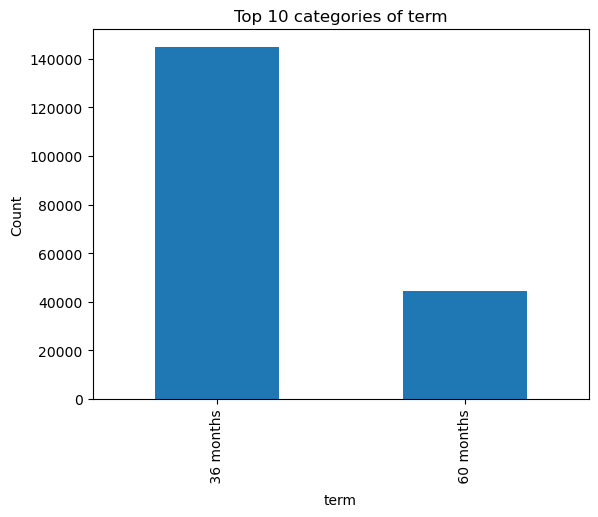

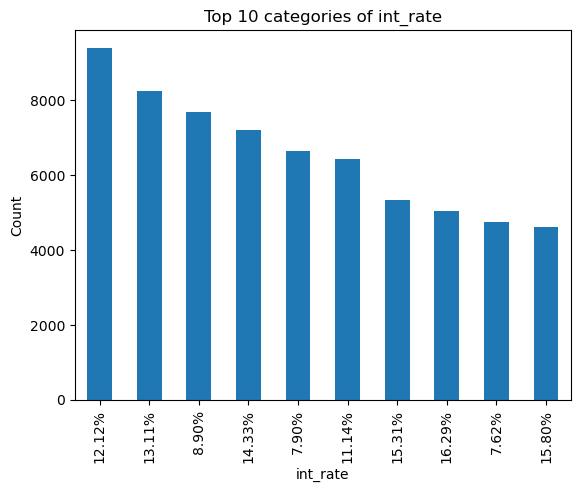

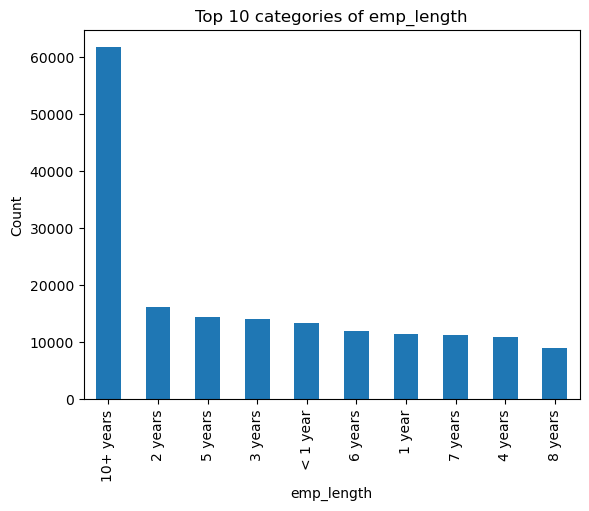

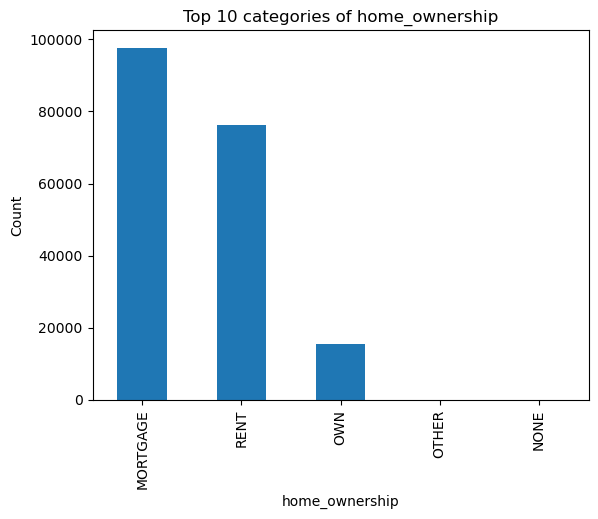

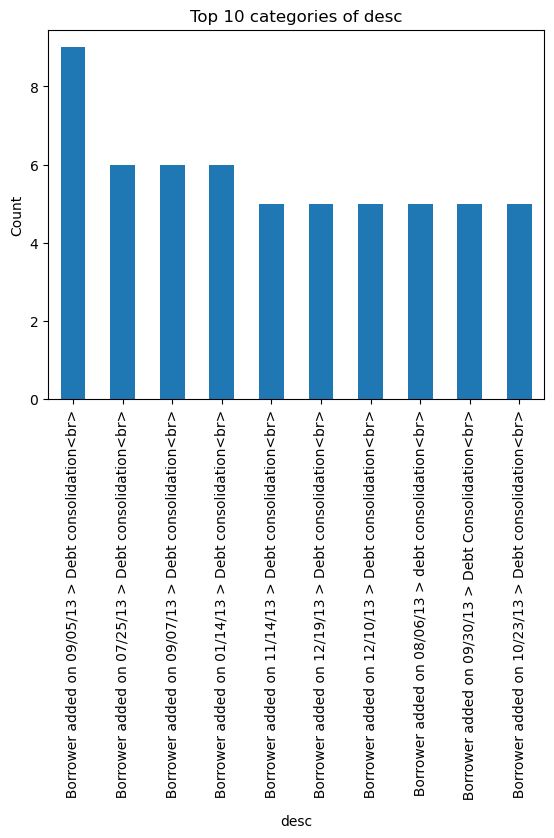

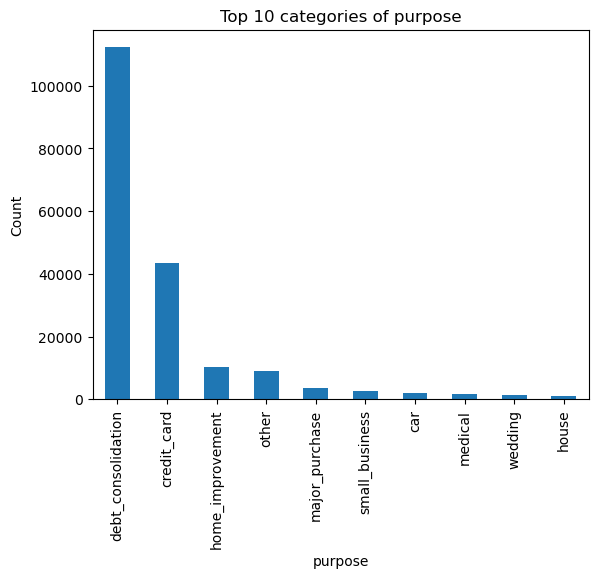

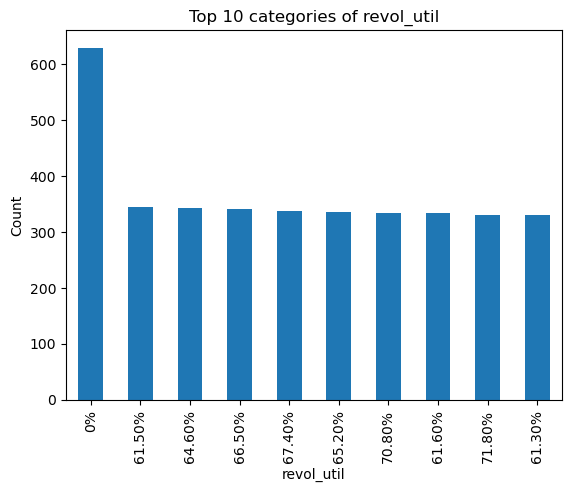

In [7]:
for col in categorical_cols:
    train[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 categories of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Some of these columns are wrong datatype or can be cleaned up a little to be better utilized.

In [8]:
#clean columns
# Clean percentage columns
if "int_rate" in train.columns:
    train["int_rate"] = train["int_rate"].str.replace("%", "").astype(float)

if "revol_util" in train.columns:
    train["revol_util"] = train["revol_util"].str.replace("%", "").astype(float)

# Clean numeric columns with commas or $ signs
for col in ["annual_inc", "tot_hi_cred_lim", "tot_cur_bal", "loan_amnt"]:
    if col in train.columns:
        train[col] = (
            train[col].astype(str)
                      .str.replace(",", "")
                      .str.replace("$", "")
        )
        train[col] = pd.to_numeric(train[col], errors="coerce")

#clean specific columns

#term
train["term"] = train["term"].str.replace(" months", "").astype(int)
#employment length
def clean_emp_length(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower()
    if "10+" in val:
        return 10
    if "<" in val:
        return 0
    digits = ''.join([c for c in val if c.isdigit()])
    return float(digits) if digits else np.nan

train["emp_length_num"] = train["emp_length"].apply(clean_emp_length)

#description - these are going to be unique. Let's just look at length of the message and a binary flag for now.
train["desc_length"] = train["desc"].fillna("").astype(str).str.len()
train["has_desc"] = (train["desc_length"] > 0).astype(int)

In [9]:
print(train.dtypes)

id                               int64
member_id                      float64
loan_amnt                        int64
term                             int64
int_rate                       float64
emp_length                      object
home_ownership                  object
annual_inc                     float64
desc                            object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                     float64
total_bc_limit                 float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
application_approved_flag        int64
internal_score                   int64
bad_flag                       float64
emp_length_num                 float64
desc_length                      int64
has_desc                 

In [10]:
train.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag,emp_length_num,desc_length,has_desc
0,10000001,11983056.0,7550,36,16.24,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,NaN,3828.953801,5759.0,1,99,0.0,3.0,0,0
1,10000002,12002921.0,27050,36,10.99,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,NaN,34359.940730,114834.0,1,353,0.0,10.0,95,1
2,10000003,11983096.0,12000,36,10.99,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,NaN,16416.617760,7137.0,1,157,0.0,4.0,176,1
3,10000004,12003142.0,28000,36,7.62,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,NaN,38014.149760,799592.0,1,365,0.0,5.0,0,0
4,10000005,11993233.0,12000,36,13.53,10+ years,RENT,40000.0,NaN,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,53.0,6471.462236,13605.0,1,157,0.0,10.0,0,0


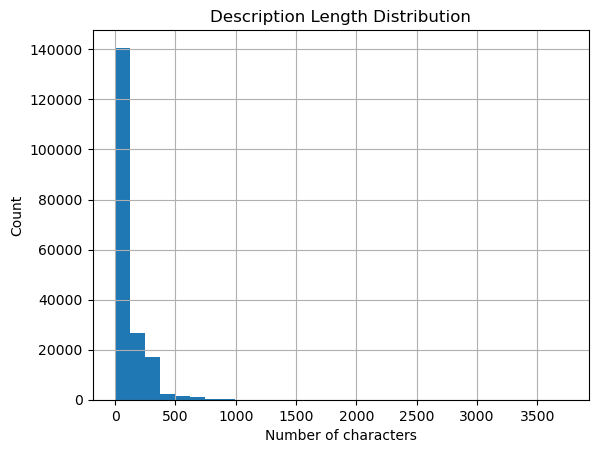

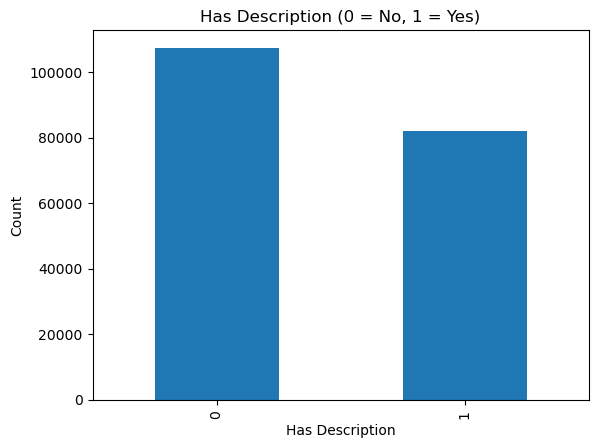

In [11]:
#examine lengths
train["desc_length"].hist(bins=30)
plt.title("Description Length Distribution")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

# Bar chart for has_desc
train["has_desc"].value_counts().plot(kind="bar")
plt.title("Has Description (0 = No, 1 = Yes)")
plt.xlabel("Has Description")
plt.ylabel("Count")
plt.show()

Correlation of numeric features with bad_flag:
id                             0.140583
int_rate                       0.120711
inq_last_6mths                 0.059158
percent_bc_gt_75               0.048621
bc_util                        0.042832
revol_util                     0.041103
dti                            0.039641
term                           0.038078
desc_length                    0.037242
has_desc                       0.028136
loan_amnt                      0.009112
internal_score                 0.009109
mths_since_last_major_derog   -0.002508
emp_length_num                -0.021267
tot_cur_bal                   -0.039655
annual_inc                    -0.041267
tot_hi_cred_lim               -0.047531
total_bc_limit                -0.047833
mths_since_recent_inq         -0.052325
member_id                     -0.133400
application_approved_flag           NaN
Name: bad_flag, dtype: float64


C:\Users\luwil\AppData\Local\Temp\ipykernel_16312\2879229280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


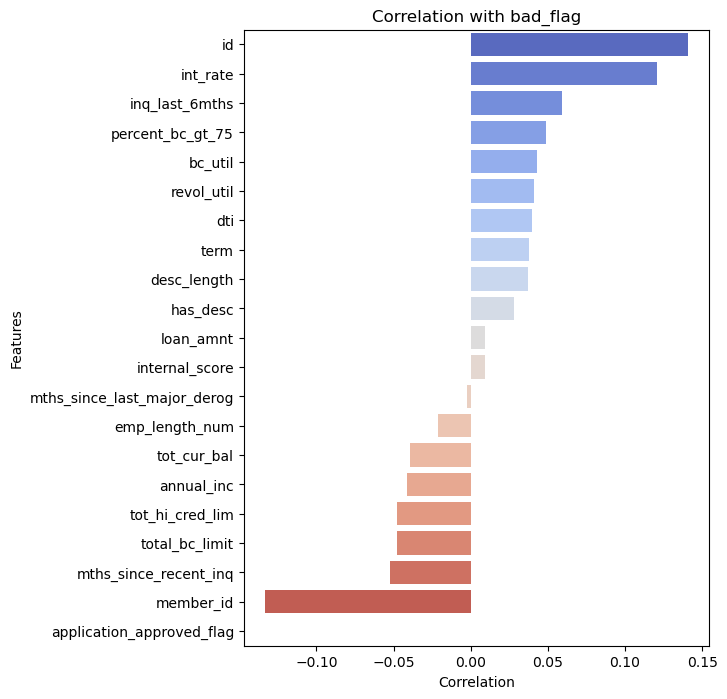

In [12]:
#looking at correlations with dependent variable

# Select only numeric columns
numeric_cols = train.select_dtypes(include=["number"]).columns

# Compute correlations
corr = train[numeric_cols].corr()

# Focus on bad_flag only
target_corr = corr["bad_flag"].drop("bad_flag").sort_values(ascending=False)

print("Correlation of numeric features with bad_flag:")
print(target_corr)

# Plot
plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation with bad_flag")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

some key insights: id and member_id are likely irrelevant as this shouldn't loans. The other variables largely make sense; higher interest rate loans tend to be bad, and more months since last inquiry tends to lead to better loans.

## looking at independent variables and their correlations

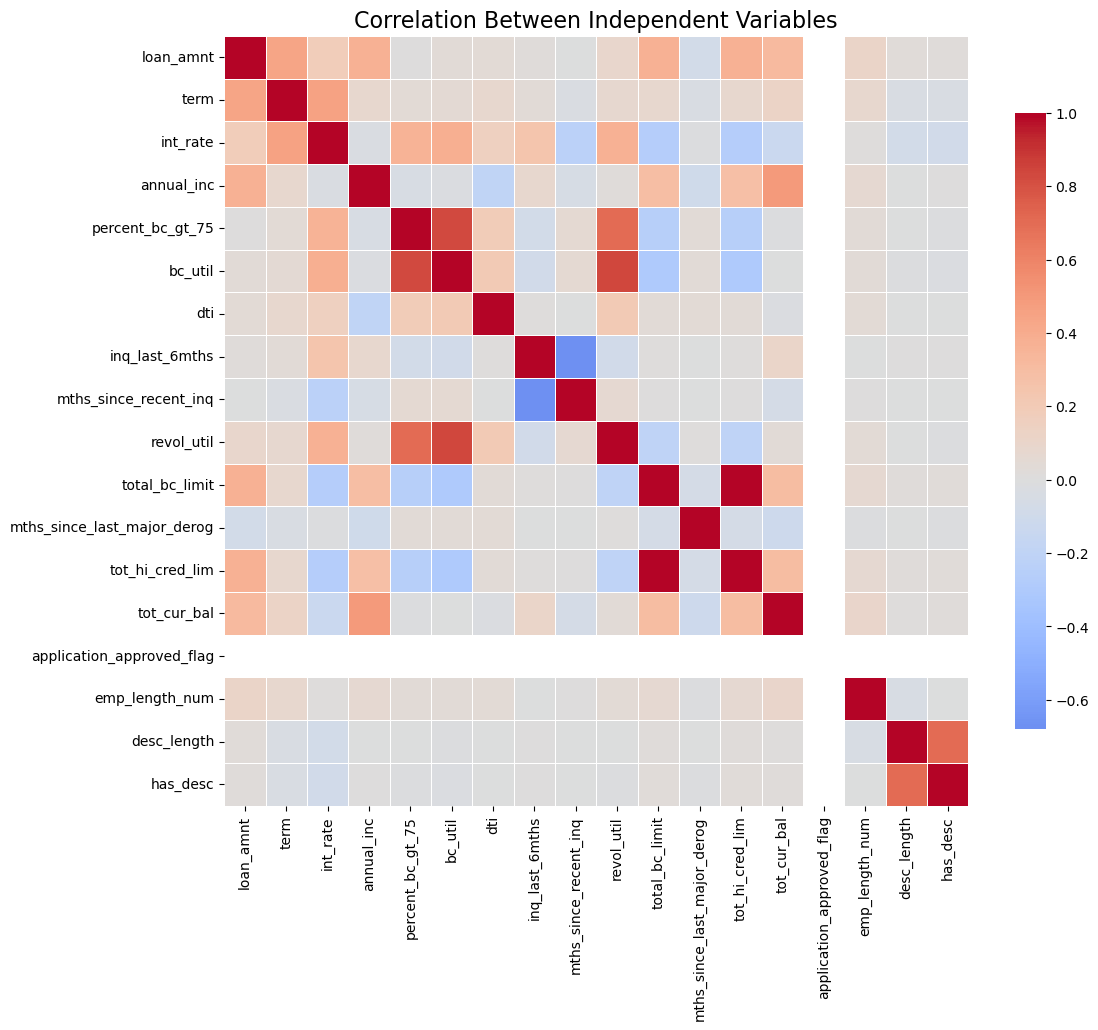

In [18]:
# Select only numeric columns (excluding the dependent variable and certain variables we don't want to include like id columns)
independent_vars = train.drop(columns=["bad_flag", "id", "member_id", "internal_score"]).select_dtypes(include=["number"])

# Compute correlation matrix
indep_corr = independent_vars.corr()

# Heatmap visualization
plt.figure(figsize=(12,10))
sns.heatmap(indep_corr, annot=False, cmap="coolwarm", center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Between Independent Variables", fontsize=16)
plt.show()

In [19]:

# Flatten the correlation matrix (ignore self-correlations)
corr_pairs = (
    indep_corr.where(~np.tril(np.ones(indep_corr.shape)).astype(bool))  # keep upper triangle only
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

# Most positively correlated pair
most_corr = corr_pairs.loc[corr_pairs["Correlation"].idxmax()]

# Most negatively correlated pair
least_corr = corr_pairs.loc[corr_pairs["Correlation"].idxmin()]

print("Most positively correlated variables:")
print(most_corr)

print("\nMost negatively correlated variables:")
print(least_corr)

Most positively correlated variables:
Feature 1       total_bc_limit
Feature 2      tot_hi_cred_lim
Correlation           0.996459
Name: 116, dtype: object

Most negatively correlated variables:
Feature 1             inq_last_6mths
Feature 2      mths_since_recent_inq
Correlation                -0.678827
Name: 91, dtype: object


mostly a sanity check our highly correlated variables make sense like the two credit limit variables. And the two inquiry variables are expected to move opposite one another, hence the strong negative correlation.